# 1. Install Dependencies and Setup

In [100]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.13.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)


  ERROR: Command errored out with exit status 1:
   command: 'C:\ProgramData\Anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\pragu\\AppData\\Local\\Temp\\pip-install-qkgj9qd6\\tensorflow-gpu_9aaf2d4444b34775a798541fba13fe43\\setup.py'"'"'; __file__='"'"'C:\\Users\\pragu\\AppData\\Local\\Temp\\pip-install-qkgj9qd6\\tensorflow-gpu_9aaf2d4444b34775a798541fba13fe43\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\pragu\AppData\Local\Temp\pip-wheel-wwwi01yk'
       cwd: C:\Users\pragu\AppData\Local\Temp\pip-install-qkgj9qd6\tensorflow-gpu_9aaf2d4444b34775a798541fba13fe43\
  Complete output (17 lines):
  Traceback (most recent call last):
    File "<string>", line 1, in <module>
    File "C:\Us


  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  ----------------------------------------
  ERROR: Failed building wheel for tensorflow-gpu
    ERROR: Command errored out with exit status 1:
     command: 'C:\ProgramData\Anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\pragu\\AppData\\Local\\Temp\\pip-install-qkgj9qd6\\tensorflow-gpu_9aaf2d4444b34775a798541fba13fe43\\setup.py'"'"'; __file__='"'"'C:\\Users\\pragu\\AppData\\Local\\Temp\\pip-install-qkgj9qd6\\tensorflow-gpu_9aaf2d4444b34775a798541fba13fe43\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'

In [101]:
!pip list

  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
    Running setup.py install for tensorflow-gpu: started
    Running setup.py install for tensorflow-gpu: finished with status 'error'
Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-client               1.9.0
anaconda-navigator            2.1.4
anaconda-project              0.10.2
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.6.6
astropy                       5.0.4
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat     

In [102]:
!pip install opencv-python


mistune                       0.8.4
mkl-fft                       1.3.1
mkl-random                    1.2.2
mkl-service                   2.4.0
mock                          4.0.3
MouseInfo                     0.1.3
mpmath                        1.2.1
msgpack                       1.0.2
multidict                     5.1.0
multipledispatch              0.6.0
munkres                       1.1.4
mypy-extensions               0.4.3
navigator-updater             0.2.1
nbclassic                     0.3.5
nbclient                      0.5.13
nbconvert                     6.4.4
nbformat                      5.3.0
nest-asyncio                  1.5.5
networkx                      2.7.1
nltk                          3.7
nose                          1.3.7
notebook                      6.4.8
numba                         0.55.1
numexpr                       2.8.1
numpy                         1.24.3
numpydoc                      1.2
oauthlib                      3.2.2
olefile                     

In [57]:
import tensorflow as tf
import os

In [58]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [59]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [60]:
import cv2
import imghdr

In [61]:
data_dir = 'data' 

In [62]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [63]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [64]:
import numpy as np
from matplotlib import pyplot as plt

In [65]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [66]:
data_iterator = data.as_numpy_iterator()

In [67]:
batch = data_iterator.next()

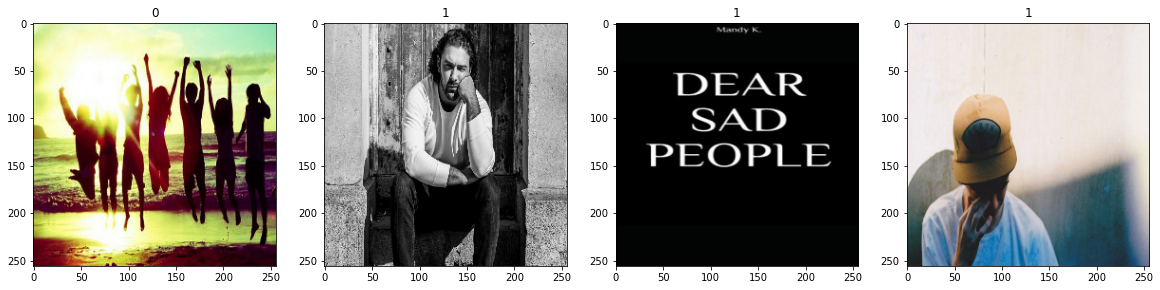

In [68]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [69]:
data = data.map(lambda x,y: (x/255, y))

In [70]:
data.as_numpy_iterator().next()

(array([[[[0.4912071 , 0.51473653, 0.46835172],
          [0.50701594, 0.53054535, 0.49132967],
          [0.5299939 , 0.5568934 , 0.51599264],
          ...,
          [0.797212  , 0.85211396, 0.85211396],
          [0.7805147 , 0.8354167 , 0.8354167 ],
          [0.7657169 , 0.82061887, 0.82061887]],
 
         [[0.4912071 , 0.51473653, 0.46835172],
          [0.50701594, 0.53054535, 0.49132967],
          [0.5299939 , 0.5568934 , 0.51599264],
          ...,
          [0.79834414, 0.8532461 , 0.8532461 ],
          [0.7805147 , 0.8354167 , 0.8354167 ],
          [0.7681253 , 0.82302725, 0.82302725]],
 
         [[0.4912071 , 0.51473653, 0.46835172],
          [0.50701594, 0.53054535, 0.49132967],
          [0.5299939 , 0.5568934 , 0.51599264],
          ...,
          [0.7988971 , 0.85379905, 0.85379905],
          [0.7805147 , 0.8354167 , 0.8354167 ],
          [0.7693015 , 0.82420343, 0.82420343]],
 
         ...,
 
         [[0.358824  , 0.36274558, 0.33921617],
          [0.36179

# 5. Split Data

In [71]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [72]:
train_size

7

In [73]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [74]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [76]:
model = Sequential()

In [77]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [78]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [79]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

# 7. Train

In [80]:
logdir='logs'

In [81]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [82]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 12s 1s/step - loss: 0.8747 - accuracy: 0.5491 - val_loss: 0.6394 - val_accuracy: 0.5312
Epoch 2/20
7/7 [==============================] - 10s 1s/step - loss: 0.6617 - accuracy: 0.5938 - val_loss: 0.6368 - val_accuracy: 0.5469
Epoch 3/20
7/7 [==============================] - 10s 1s/step - loss: 0.6397 - accuracy: 0.5893 - val_loss: 0.5966 - val_accuracy: 0.8906
Epoch 4/20
7/7 [==============================] - 12s 2s/step - loss: 0.5578 - accuracy: 0.7411 - val_loss: 0.6517 - val_accuracy: 0.6250
Epoch 5/20
7/7 [==============================] - 10s 1s/step - loss: 0.5492 - accuracy: 0.7321 - val_loss: 0.5434 - val_accuracy: 0.7656
Epoch 6/20
7/7 [==============================] - 10s 1s/step - loss: 0.4633 - accuracy: 0.8080 - val_loss: 0.4131 - val_accuracy: 0.8750
Epoch 7/20
7/7 [==============================] - 10s 1s/step - loss: 0.3784 - accuracy: 0.8482 - val_loss: 0.3542 - val_accuracy: 0.8281
Epoch 8/20
7/7 [==================

# 8. Plot Performance

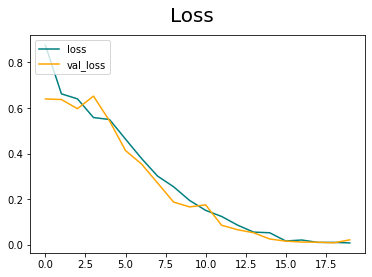

In [83]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

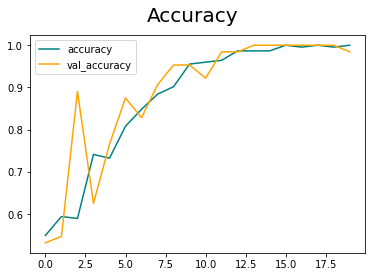

In [84]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [85]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [86]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [87]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 154ms/step


In [88]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [89]:
import cv2

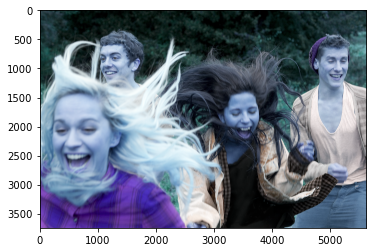

In [90]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

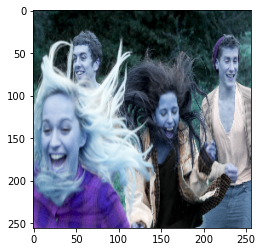

In [91]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [92]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 36ms/step


In [93]:
yhat

array([[0.06626037]], dtype=float32)

In [94]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [95]:
from tensorflow.keras.models import load_model

In [96]:
model.save(os.path.join('models','emotionclassifier.h5'))

In [98]:
new_model = load_model('models/emotionclassifier.h5')

In [99]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 81ms/step


array([[0.06626037]], dtype=float32)